<a href="https://colab.research.google.com/github/sammyamajumdar/Neural_Networks/blob/master/Layer_Visualization_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sammyamajumdar","key":"8bed6789a501534ffe03f24b72485d0b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 99% 538M/543M [00:04<00:00, 102MB/s]
100% 543M/543M [00:04<00:00, 118MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 79.7MB/s]
 97% 263M/271M [00:02<00:00, 132MB/s]
100% 271M/271M [00:02<00:00, 131MB/s]


In [42]:
"""from zipfile import ZipFile
file_name = "test1.zip"
with ZipFile(file_name) as zippp:
    zippp.extractall()
    print("Done extracting test set!")
file_name = "train.zip"
with ZipFile(file_name) as zippp:
    zippp.extractall()
    print("Done extracting train set!")"""

'from zipfile import ZipFile\nfile_name = "test1.zip"\nwith ZipFile(file_name) as zippp:\n    zippp.extractall()\n    print("Done extracting test set!")\nfile_name = "train.zip"\nwith ZipFile(file_name) as zippp:\n    zippp.extractall()\n    print("Done extracting train set!")'

In [3]:
import os, shutil
original_dataset_dir = "/content/train"
base_dir = "/content/"

"""train_dir = os.path.join(base_dir, "train_dir")
os.mkdir(train_dir)
validation_new_dir = os.path.join(base_dir, "validation_new_dir")
os.mkdir(validation_new_dir)
test_dir = "/content/test1" 

train_cats_dir = os.path.join(train_dir, "train_cats_dir")
os.mkdir(train_cats_dir)
validation_new_cats_dir = os.path.join(validation_new_dir, "validation_new_cats_dir")
os.mkdir(validation_new_cats_dir)

train_dogs_dir = os.path.join(train_dir, "train_dogs_dir")
os.mkdir(train_dogs_dir)
validation_new_dogs_dir = os.path.join(validation_new_dir, "validation_new_dogs_dir")
os.mkdir(validation_new_dogs_dir)"""

train_dir = "/content/train_dir"
validation_dir = "/content/validation_new_dir"
train_cats_dir = "/content/train_dir/train_cats_dir"
train_dogs_dir = "/content/train_dir/train_dogs_dir"
validation_new_cats_dir = "/content/validation_new_dir/validation_new_cats_dir"
validation_new_dogs_dir = "/content/validation_new_dir/validation_new_dogs_dir"

"""fname = [f"cat.{i}.jpg" for i in range(1000)]
for i in fname:
    try:
        src = os.path.join(original_dataset_dir, i)
        dst = os.path.join(validation_new_cats_dir, i)
        shutil.copyfile(src, dst)
    except:
        pass
fname2 = [f"cat.{j}.jpg" for j in range(1000,3000)]
for j in fname2:
    try:
        src = os.path.join(original_dataset_dir, j)
        dst = os.path.join(train_cats_dir, j)
        shutil.copyfile(src, dst)
    except:
        pass"""
"""fname3 = [f"dog.{i}.jpg" for i in range(1000)]
for k in fname3:
        src = os.path.join(original_dataset_dir, k)
        dst = os.path.join(validation_new_dogs_dir, k)
        shutil.copyfile(src, dst)"""
fname4 = [f"dog.{k}.jpg" for k in range(1001, 3000)]
for l in fname4:
        src = os.path.join(original_dataset_dir, l)
        dst = os.path.join(train_dogs_dir, l)
        shutil.copyfile(src,dst)

In [4]:
print(f"Total number of training examples : {len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))}")
print(f"Total number of validation examples : {len(os.listdir(validation_new_cats_dir)) + len(os.listdir(validation_new_dogs_dir))}")

Total number of training examples : 3999
Total number of validation examples : 2000


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def create_model():
    network = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (300,300,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = "relu"),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Dense(1, activation = "sigmoid")
    ])
    
    network.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return network
model2 = create_model()

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    "/content/train_dir",
    target_size = (300,300),
    batch_size = 50,
    class_mode = "binary"
)
validation_generator = test_datagen.flow_from_directory(
    "/content/validation_new_dir",
    target_size = (300,300),
    batch_size = 50,
    class_mode = "binary"
)
history = model2.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 32
)

Found 3999 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
50/50 [==============================] - 17s 338ms/step - loss: 0.6884 - accuracy: 0.5224 - val_loss: 0.6660 - val_accuracy: 0.5863
Epoch 2/20
50/50 [==============================] - 17s 347ms/step - loss: 0.6925 - accuracy: 0.5134 - val_loss: 0.6930 - val_accuracy: 0.5106
Epoch 3/20
50/50 [==============================] - 17s 332ms/step - loss: 0.6829 - accuracy: 0.5446 - val_loss: 0.6755 - val_accuracy: 0.5181
Epoch 4/20
50/50 [==============================] - 17s 333ms/step - loss: 0.6594 - accuracy: 0.5954 - val_loss: 0.6775 - val_accuracy: 0.5638
Epoch 5/20
50/50 [==============================] - 17s 333ms/step - loss: 0.6452 - accuracy: 0.6154 - val_loss: 0.6318 - val_accuracy: 0.6156
Epoch 6/20
50/50 [==============================] - 17s 341ms/step - loss: 0.6223 - accuracy: 0.6548 - val_loss: 0.5958 - val

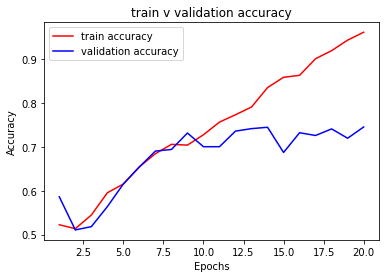

In [7]:
history_dict = history.history
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
train_accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(train_accuracy)+1)
# Accuracy Curve
plt.plot(epochs, train_accuracy, "r", label = "train accuracy")
plt.plot(epochs, val_accuracy, "b", label = "validation accuracy")
plt.title("train v validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

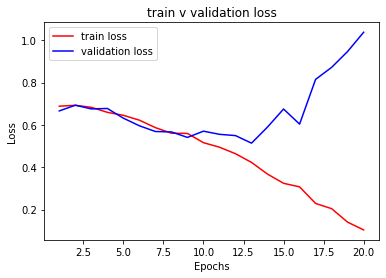

In [8]:
plt.plot(epochs, train_loss, "r", label = "train loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.title("train v validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

(1, 300, 300, 3)


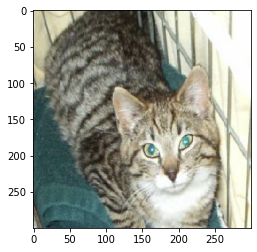

In [9]:
from keras.preprocessing import image
import numpy as np

image_path = "/content/19.jpg"
img = image.load_img(image_path, target_size = (300,300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor / 255
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

In [22]:
from keras import models
layer_outputs = [layer.output for layer in model2.layers[:5]] 
activation_model = models.Model(inputs = model2.input, outputs = layer_outputs)
activations = activation_model(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 298, 298, 32)


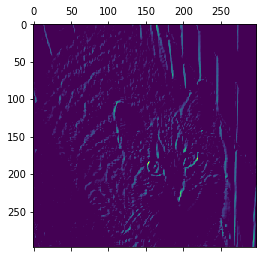

In [14]:
plt.matshow(first_layer_activation[0,:,:,8], cmap = "viridis")

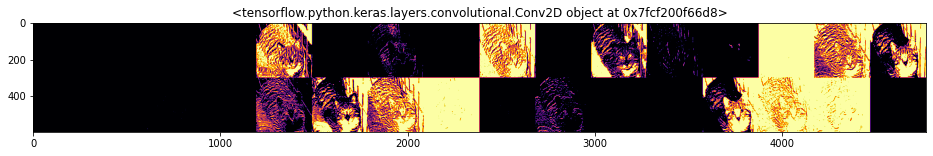

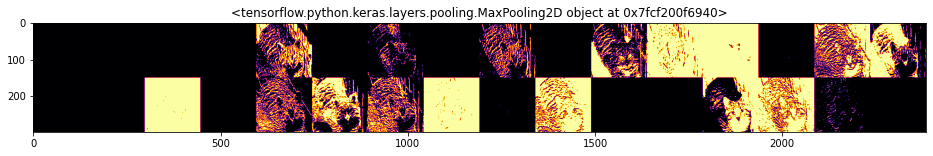

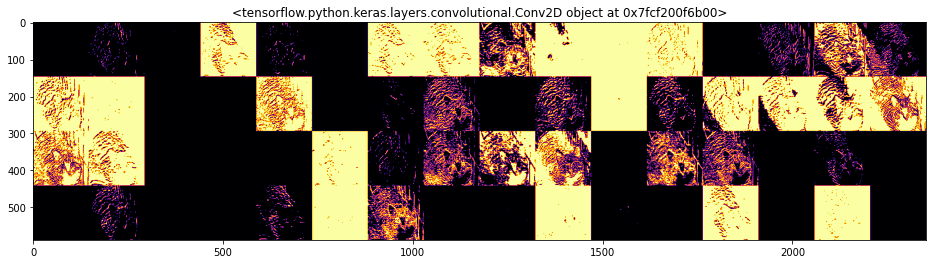

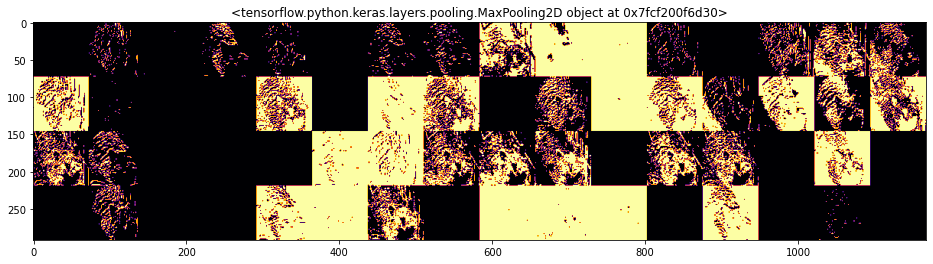

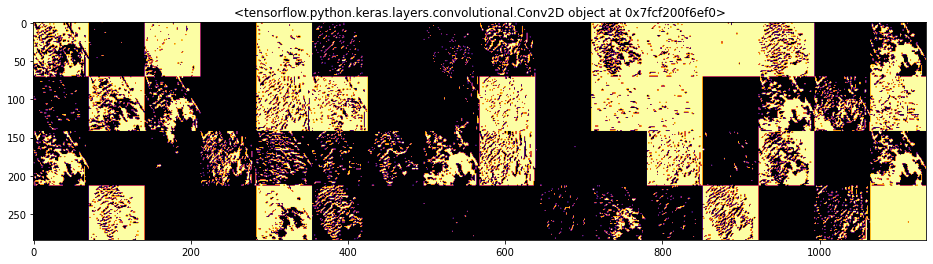

In [20]:
layer_names = []
for layer_name in model2.layers[:5]:
    layer_names.append(layer_name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1] # Size : (1,298,298,32)
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :,:, col*images_per_row + row]
            channel_image -= np.mean(channel_image)
            channel_image /= np.mean(channel_image)
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[col*size : (col+1)*size, row*size : (row+1)*size] = channel_image
    scale = 1/size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect="auto", cmap="inferno")